# Import Packages and load dataset

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline
sns.set_style('ticks', rc={'xtick.direction':'in', 'ytick.direction':'in', \
                           'xtick.top':True, 'ytick.right':True})

2022-10-22 03:28:56.698188: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
datadir = '../datasets/raw'
datadir_pr = '../datasets/processed'

In [3]:
df_wages   = pd.read_csv(os.path.join(datadir,'hourly_wages.csv'))
df_titanic = pd.read_csv(os.path.join(datadir,'titanic_all_numeric.csv'))
df_mnist   = pd.read_csv(os.path.join(datadir,'mnist.csv'))

In [4]:
df_titanic_pred = pd.read_csv(os.path.join(datadir_pr,'DeepL','titanic_pred_data.csv'),index_col=0)

In [5]:
df_mnist.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_titanic_pred.head()

,0,1,2,3,4,5,6,7,8,9
0,2.0,34.00,0.0,0.0,13.0000,1.0,0.0,0.0,0.0,1.0
1,2.0,31.00,1.0,1.0,26.2500,0.0,0.0,0.0,0.0,1.0
2,1.0,11.00,1.0,2.0,120.0000,1.0,0.0,0.0,0.0,1.0
3,3.0,0.42,0.0,1.0,8.5167,1.0,0.0,1.0,0.0,0.0
4,3.0,27.00,0.0,0.0,6.9750,1.0,0.0,0.0,0.0,1.0


In [7]:
df_titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [8]:
df_wages.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


# Basic of Deep Learning and Neural Networks

## Forward propagation

In [9]:
input_data = np.array([3, 5])

# two hidden layers + output layer
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


## Activation function
- **"activation function"** is a function applied at each node. It converts the node's input into some output.
- **rectified linear activation function (called ReLU)**
    - takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

In [10]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

In [11]:
# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


In [12]:
def predict_with_network(input_data_row, weights):
    ''' generate predictions for multiple data observations, which are input_data'''
    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [13]:
input_data = [[3,5], [1, -1], [0,0], [8,4]]
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


## Deeper Network

In [14]:
def predict_with_network_2hl(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

In [15]:
input_data = np.array([3, 5])
weights = {'node_0_0': np.array([2, 4]),   'node_0_1': np.array([ 4, -5]), \
           'node_1_0': np.array([-1,  2]), 'node_1_1': np.array([1, 2]), \
           'output': np.array([2, 7])}

output = predict_with_network_2hl(input_data)
print(output)

182


# Optimizing a neural network with backward propagation

In [16]:
input_data = np.array([[0,3], [1,2], [-1,-2], [4,0]])

# weights
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5])}

# actual values
target_actuals = np.array([1, 3, 5, 7])

In [17]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(model_output_0, target_actuals)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(model_output_1, target_actuals)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: {:f}".format(mse_0))
print("Mean squared error with weights_1: {:f}".format(mse_1))

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


## Gradient descent

### Calculating Slope

- To calculate the slope for a weight, need to multiply:
    - slope of the loss function w.r.t. value at the node we feed into (mean-squared loss function in this example): 2 x (predicted value - actual value) = 2 x Error (from derivative of mean-squared error)
    - The value of the node that feeds into our weight:
    - slope of the activation function w.r.t. value we feed into

In [18]:
input_data = np.array([1,2,3])
weights = np.array([0,2,1])
target = 0.

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print("slope: {}".format(slope))

slope: [14. 28. 42.]


### Improving model weights

In [19]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print("error before updates: {}".format(error))

# Print the updated error
print("error after updates: {}".format(error_updated))

error before updates: 7.0
error after updates: 5.04


In [20]:
def get_error(input_data, target, weights):
    ''' calculate error '''
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

def get_slope(input_data, target, weights):
    ''' compute slope of weights '''
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    ''' compute mean squared error '''
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

In [21]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - slope * 0.01
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

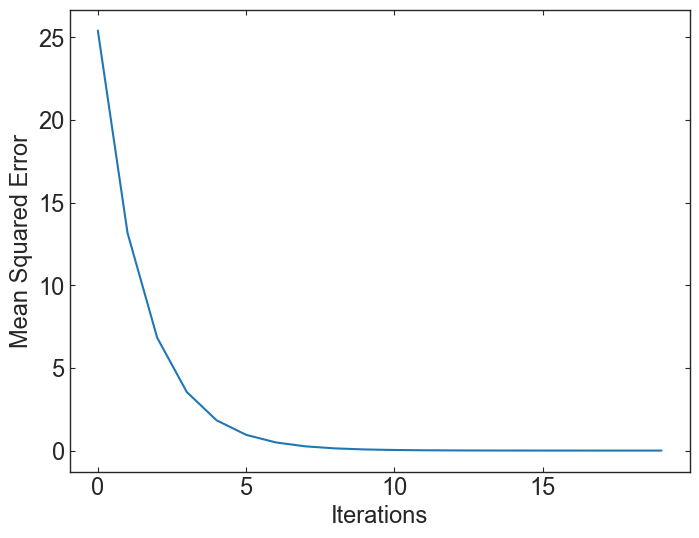

In [22]:
fig, ax = plt.subplots()
# Plot the mse history
ax.plot(mse_hist)
ax.set(xlabel='Iterations', ylabel='Mean Squared Error');

# Building Deep Learning models with `keras`

In [23]:
df_wages.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [24]:
df_wages.shape

(534, 10)

In [25]:
predictors = df_wages.drop(columns='wage_per_hour').values
target = df_wages.wage_per_hour.values

In [26]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

2022-10-22 03:29:04.325194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compile & Fit

In [27]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

# Fit the model
model.fit(predictors, target)

Loss function: mean_squared_error
17/17 [==============================] - 0s 1ms/step - loss: 38.0390


## Classification Case

In [28]:
df_titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [29]:
predictors = df_titanic.drop(columns='survived').values
predictors = np.asarray(predictors).astype(np.float32)  # convert data type into float
n_cols = predictors.shape[1]

print(np.shape(predictors))

(891, 10)


In [30]:
# Convert the target to categorical: target
target = to_categorical(df_titanic.survived)
print(target.shape)

(891, 2)


In [31]:
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape = (n_cols,))) 

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

28/28 [==============================] - 0s 1ms/step - loss: 2.7350 - accuracy: 0.5937


In [32]:
pred_data = df_titanic_pred.values
print(pred_data.shape)

(91, 10)


In [33]:
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# Print predicted_prob_true
print(predicted_prob_true)

3/3 [==============================] - 0s 2ms/step
[7.86367133e-02 1.73099294e-01 7.13262558e-01 2.59588420e-01
 1.26236901e-01 8.83022994e-02 2.02334523e-02 2.24013895e-01
 4.64221649e-02 5.01891136e-01 1.46017000e-01 5.64527847e-02
 6.13869652e-02 3.42097819e-01 9.43646207e-02 5.11273518e-02
 1.73288032e-01 2.93323129e-01 2.26753559e-02 4.03438807e-01
 6.75888717e-01 1.38147309e-01 2.25557778e-02 1.56831428e-01
 2.68011123e-01 7.70393237e-02 5.56531489e-01 4.02677357e-01
 8.06149244e-02 2.22538725e-01 2.79120684e-01 3.61893386e-01
 8.75195041e-02 1.86434478e-01 2.44791701e-01 7.94271350e-01
 2.09093034e-01 9.42286029e-02 5.36637425e-01 1.84949175e-01
 2.23358572e-01 2.58653283e-01 1.68806076e-01 5.51695898e-02
 2.56480634e-01 2.70265602e-02 5.20118594e-01 5.69491722e-02
 2.90937304e-01 8.13657343e-01 2.75025427e-01 7.80169328e-04
 3.92936230e-01 6.50485039e-01 4.79092263e-02 2.64170319e-01
 9.62843001e-01 2.88299192e-02 2.99262166e-01 8.75195041e-02
 6.97530955e-02 2.28921428e-01 3.4

# Fine-tuning `keras` Models
- optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate

In [34]:
def get_new_model(input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [35]:
# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model(input_shape=(n_cols,))
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(learning_rate=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

28/28 [==============================] - 0s 926us/step - loss: 4.1029


Testing model with learning rate: 0.010000

28/28 [==============================] - 0s 1ms/step - loss: 1.7612


Testing model with learning rate: 1.000000

28/28 [==============================] - 0s 900us/step - loss: 1586479.5000


## Model Validation

In [36]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

20/20 [==============================] - 0s 9ms/step - loss: 0.7950 - accuracy: 0.6453 - val_loss: 0.6009 - val_accuracy: 0.6903


### Early Stopping: Optimizing the optimization
- stop optimization when it isn't helping any more.

In [37]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 0s 8ms/step - loss: 0.7595 - accuracy: 0.6196 - val_loss: 0.6778 - val_accuracy: 0.7127
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.8201 - accuracy: 0.6035 - val_loss: 0.5474 - val_accuracy: 0.7164
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6549 - val_loss: 0.5546 - val_accuracy: 0.7239
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 0.7647 - accuracy: 0.6228 - val_loss: 0.5254 - val_accuracy: 0.7351
Epoch 5/30
20/20 [==============================] - 0s 3ms/step - loss: 0.5871 - accuracy: 0.7030 - val_loss: 0.5983 - val_accuracy: 0.6791
Epoch 6/30
20/20 [==============================] - 0s 3ms/step - loss: 0.5904 - accuracy: 0.6886 - val_loss: 0.6031 - val_accuracy: 0.6679


### Experimenting with wider networks

In [38]:
# Create the new model: model_2
model_1 = Sequential()

# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile model_1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dense_24 (Dense)            (None, 2)                 22        
                                                                 
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 100)               1100      
                                                                 
 dense_26 (Dense)            (None, 100)               10100     
                                                                 
 dense_27 (Dense)            (None, 2)                 202       
                                                                 
Total params: 11,402
Trainable params: 11,402
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

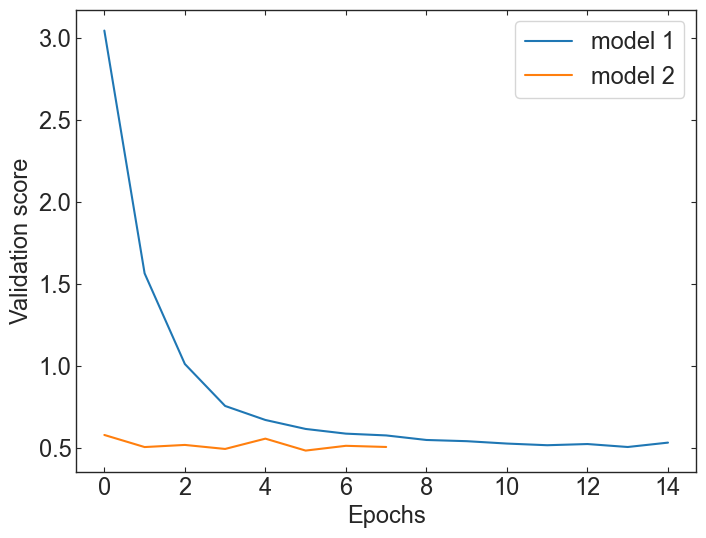

In [43]:
fig, ax = plt.subplots()
# Create the plot
ax.plot(model_1_training.history['val_loss'], label='model 1')
ax.plot(model_2_training.history['val_loss'], label='model 2')
ax.set(xlabel='Epochs', ylabel='Validation score')

ax.legend(loc='best');

## Adding layers to a network

In [44]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_3 = Sequential()

# Add the first, second, and third hidden layers
model_3.add(Dense(10, activation='relu', input_shape=input_shape))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dense(10, activation='relu'))

# Add the output layer
model_3.add(Dense(2, activation='softmax'))

# Compile model_2
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dense_30 (Dense)            (None, 10)                110       
                                                                 
 dense_31 (Dense)            (None, 2)                 22        
                                                                 
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.4, verbose=False)

# Fit model 2
model_3_training = model_2.fit(predictors, target, epochs=15, validation_split=0.4, verbose=False)

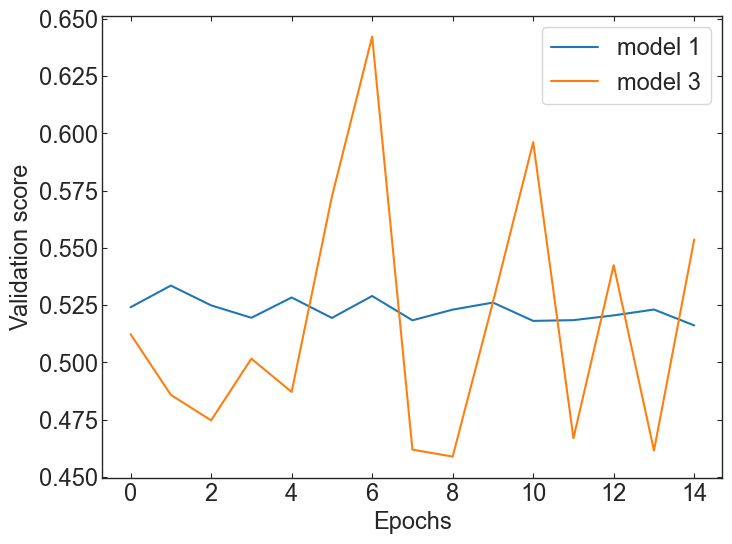

In [47]:
fig, ax = plt.subplots()
# Create the plot
ax.plot(model_1_training.history['val_loss'], label='model 1')
ax.plot(model_3_training.history['val_loss'], label='model 3')
ax.set(xlabel='Epochs', ylabel='Validation score')
ax.legend(loc='best');

## Digit Recognition model

In [48]:
df_mnist.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 785 entries, 5 to 0.617
dtypes: int64(785)
memory usage: 12.0 MB


In [50]:
X = df_mnist.drop(columns='5').values

print(X.shape)

(2000, 784)


In [51]:
y = df_mnist['5'].values
y = to_categorical(y)

print(y.shape)

(2000, 10)


In [52]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3, epochs=10)

Epoch 1/10
44/44 [==============================] - 1s 5ms/step - loss: 23.3855 - accuracy: 0.4314 - val_loss: 8.9243 - val_accuracy: 0.5717
Epoch 2/10
44/44 [==============================] - 0s 2ms/step - loss: 4.1436 - accuracy: 0.6993 - val_loss: 5.7181 - val_accuracy: 0.6417
Epoch 3/10
44/44 [==============================] - 0s 2ms/step - loss: 1.9487 - accuracy: 0.8050 - val_loss: 4.9994 - val_accuracy: 0.6817
Epoch 4/10
44/44 [==============================] - 0s 2ms/step - loss: 1.0699 - accuracy: 0.8607 - val_loss: 4.5219 - val_accuracy: 0.6683
Epoch 5/10
44/44 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.8843 - val_loss: 4.2413 - val_accuracy: 0.7100
Epoch 6/10
44/44 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.9221 - val_loss: 4.2619 - val_accuracy: 0.6917
Epoch 7/10
44/44 [==============================] - 0s 2ms/step - loss: 0.2763 - accuracy: 0.9414 - val_loss: 4.2265 - val_accuracy: 0.7050
Epoch 8/10
44/44 [=